In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, confusion_matrix)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [2]:
np.random.seed(1337)  # for reproducibility

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [29]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.decomposition import PCA, KernelPCA
from PIL import Image
import tensorflow as tf
from sklearn.decomposition import NMF


In [3]:
df = pd.read_csv('traindf.csv')
df_test = pd.read_csv('traindf.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

feature = df.select_dtypes(exclude=[np.number])

print(feature.columns)
for i in feature.columns:
    df[i] = LabelEncoder().fit_transform(df[i])
    

Index(['protocol_type', 'service', 'flag', 'target', 'attack_type'], dtype='object')


In [5]:
feature = df_test.select_dtypes(exclude=[np.number])

print(feature.columns)
for i in feature.columns:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])
    


Index(['protocol_type', 'service', 'flag', 'target', 'attack_type'], dtype='object')


In [6]:
X = df.iloc[:,0:42]
Y = df.iloc[:,42]
C = df_test.iloc[:,42]
T = df_test.iloc[:,0:42]

In [7]:
from sklearn.preprocessing import QuantileTransformer


In [7]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)



X_train = np.array(trainX)
X_test = np.array(testT)

In [9]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential()

# Convolutional layers
model.add(Conv1D(64, 3, padding="same", activation="relu", input_shape=(42, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))

# LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(768, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [12]:
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))


Epoch 1/100
9720/9720 [==============================] - 174s 18ms/step - loss: 0.4409 - accuracy: 0.7862 - val_loss: 0.4343 - val_accuracy: 0.7882
Epoch 2/100
9720/9720 [==============================] - 158s 16ms/step - loss: 0.4402 - accuracy: 0.7864 - val_loss: 0.4357 - val_accuracy: 0.7890
Epoch 3/100
9720/9720 [==============================] - 162s 17ms/step - loss: 0.4397 - accuracy: 0.7862 - val_loss: 0.4358 - val_accuracy: 0.7889
Epoch 4/100
9720/9720 [==============================] - 163s 17ms/step - loss: 0.4379 - accuracy: 0.7871 - val_loss: 0.4975 - val_accuracy: 0.7889
Epoch 5/100
9720/9720 [==============================] - 157s 16ms/step - loss: 0.4377 - accuracy: 0.7874 - val_loss: 0.4327 - val_accuracy: 0.7895
Epoch 6/100
9720/9720 [==============================] - 157s 16ms/step - loss: 0.4369 - accuracy: 0.7876 - val_loss: 0.4309 - val_accuracy: 0.7896
Epoch 7/100
9720/9720 [==============================] - 162s 17ms/step - loss: 0.4362 - accuracy: 0.7874 - val_

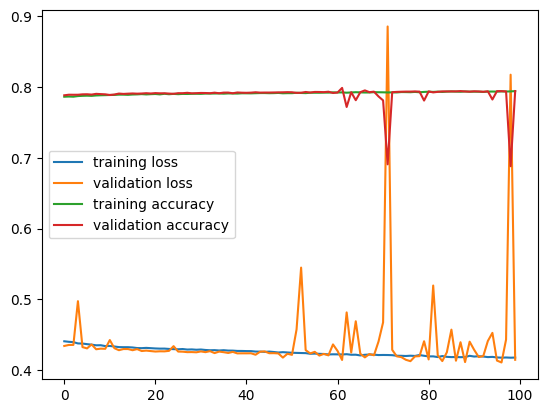

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, confusion_matrix)
import seaborn as sns

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [27]:
model.save("cnn_model.hdf5")


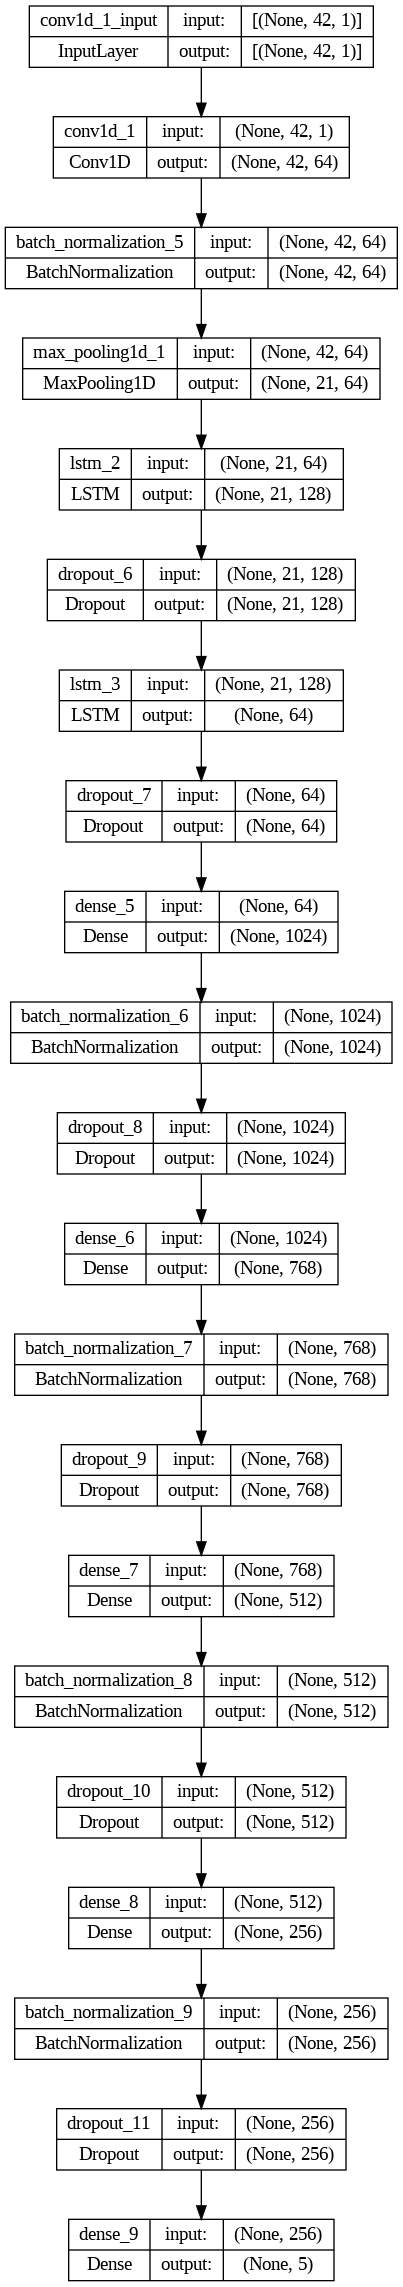

In [28]:
plot_model(model, to_file="deep_model.png", show_shapes=True)


9720/9720 [==============================] - 35s 4ms/step


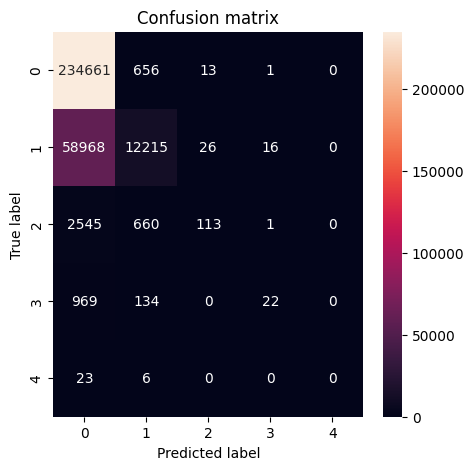

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
